In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler,StandardScaler,MaxAbsScaler,MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import xgboost
import warnings
warnings.filterwarnings('ignore')

In [41]:
df=pd.read_csv(r"C:\Users\DELL\Desktop\Task2\IMDb Movies India.csv", encoding='ISO-8859-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [314]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [3]:
df.shape

(15509, 10)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [6]:
df.duplicated().sum()

6

In [43]:
df.dropna(inplace=True)

In [8]:
df.shape

(5659, 10)

In [49]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [47]:
df.drop_duplicates(inplace=True)

In [48]:
df.duplicated().sum()

0

In [12]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [50]:
df['Year'].str.replace(r'[()]', '',regex=True).astype(int)

1        2019
3        2019
5        1997
6        2005
8        2012
         ... 
15493    2015
15494    2001
15503    1989
15505    1999
15508    1998
Name: Year, Length: 5659, dtype: int32

In [ ]:
df["Year"] = df["Year"].str.extract('(\d+)').astype(int)

In [51]:
df['Duration'] = pd.to_numeric(df['Duration'].str.replace(' min', ''))


In [52]:
df['Votes'] = pd.to_numeric(df['Votes'].str.replace(',',''))

In [53]:
df['Genre'] = df['Genre'].str.split(', ')
df=df.explode('Genre')
df['Genre'].fillna( df['Genre'].mode()[0], inplace=True)

In [54]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,#Yaaram,(2019),110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11979 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11979 non-null  object 
 1   Year      11979 non-null  object 
 2   Duration  11979 non-null  int64  
 3   Genre     11979 non-null  object 
 4   Rating    11979 non-null  float64
 5   Votes     11979 non-null  int64  
 6   Director  11979 non-null  object 
 7   Actor 1   11979 non-null  object 
 8   Actor 2   11979 non-null  object 
 9   Actor 3   11979 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 1.0+ MB


In [56]:
df.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

# Data Analysis & Visualization

In [318]:
df.describe()

,Year,Duration,Rating,Votes
count,11979.000000,11979.000000,11979.000000,11979.000000
mean,1996.099174,135.871024,5.879356,3335.405293
std,19.314008,25.012586,1.374243,15305.935731
min,1931.000000,21.000000,1.100000,5.000000
25%,1982.000000,120.000000,5.000000,41.000000
50%,2001.000000,137.000000,6.100000,213.000000
75%,2012.000000,152.000000,6.900000,1469.000000
max,2021.000000,321.000000,10.000000,591417.000000


In [315]:
df.max()

Name                Zulmi
Year                 2021
Duration              321
Genre             Western
Rating               10.0
Votes              591417
Director     Zunaid Memon
Actor 1       Zulfi Sayed
Actor 2     Zuber K. Khan
Actor 3       Zulfi Sayed
dtype: object

In [316]:
df.min()

Name        #Gadhvi (He thought he was Gandhi)
Year                                      1931
Duration                                    21
Genre                                   Action
Rating                                     1.1
Votes                                        5
Director                          A. Bhimsingh
Actor 1                               A. Muthu
Actor 2                             A.H. Shore
Actor 3                            A.K. Hangal
dtype: object

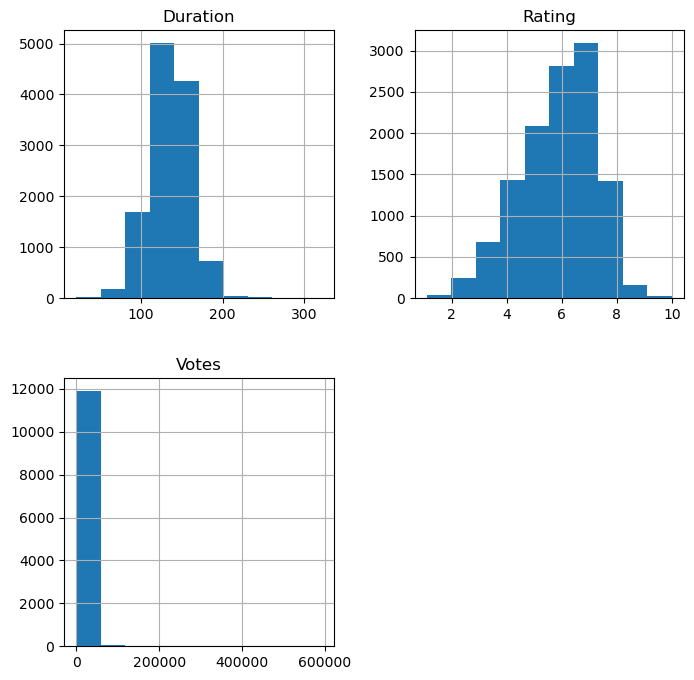

In [45]:
df.hist(figsize=(8,8))
plt.show()

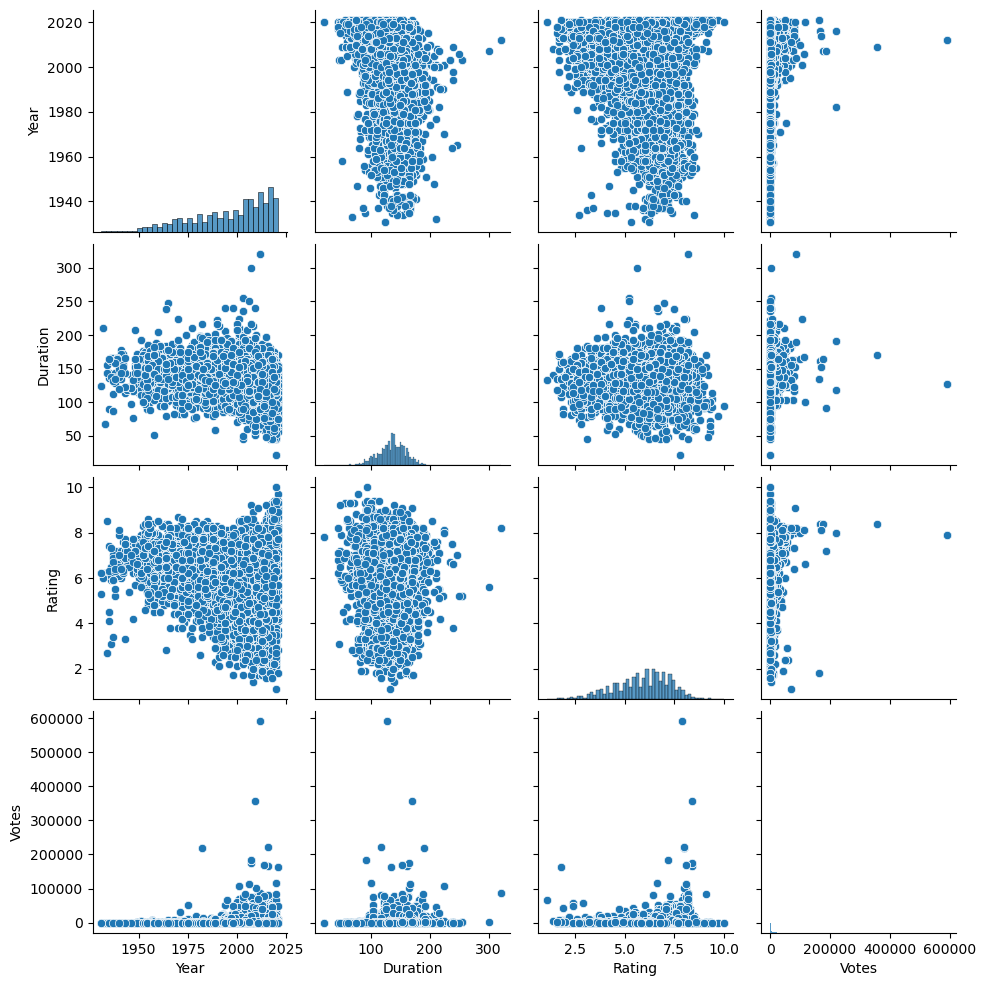

In [270]:
sns.pairplot(df)
plt.show()

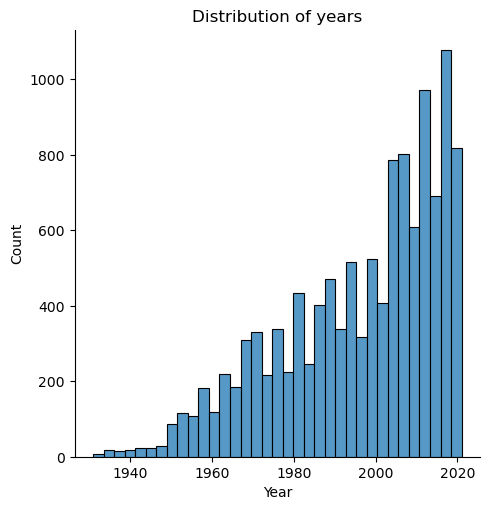

In [275]:
sns.displot(df['Year'])
plt.title("Distribution of years")
plt.show()

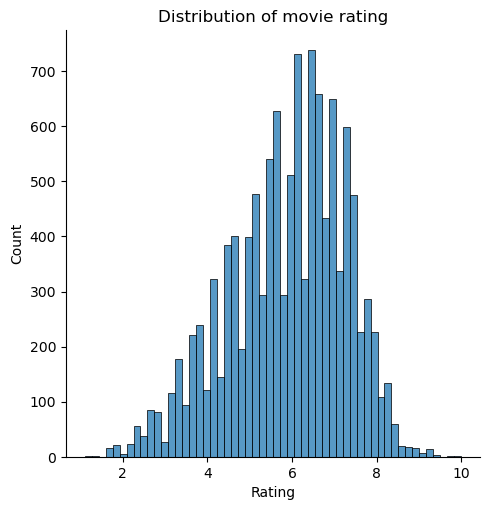

In [276]:
sns.displot(df['Rating'])
plt.title("Distribution of movie rating")
plt.show()

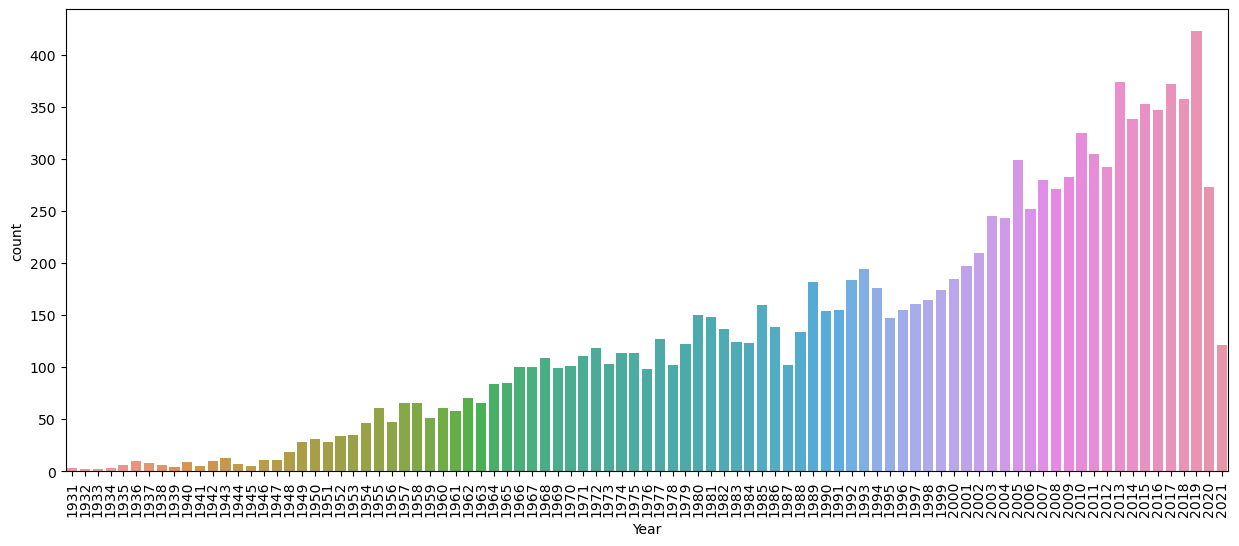

In [281]:
plt.figure(figsize=(15,6))
sns.countplot(x=df["Year"])
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Director with no of movie')

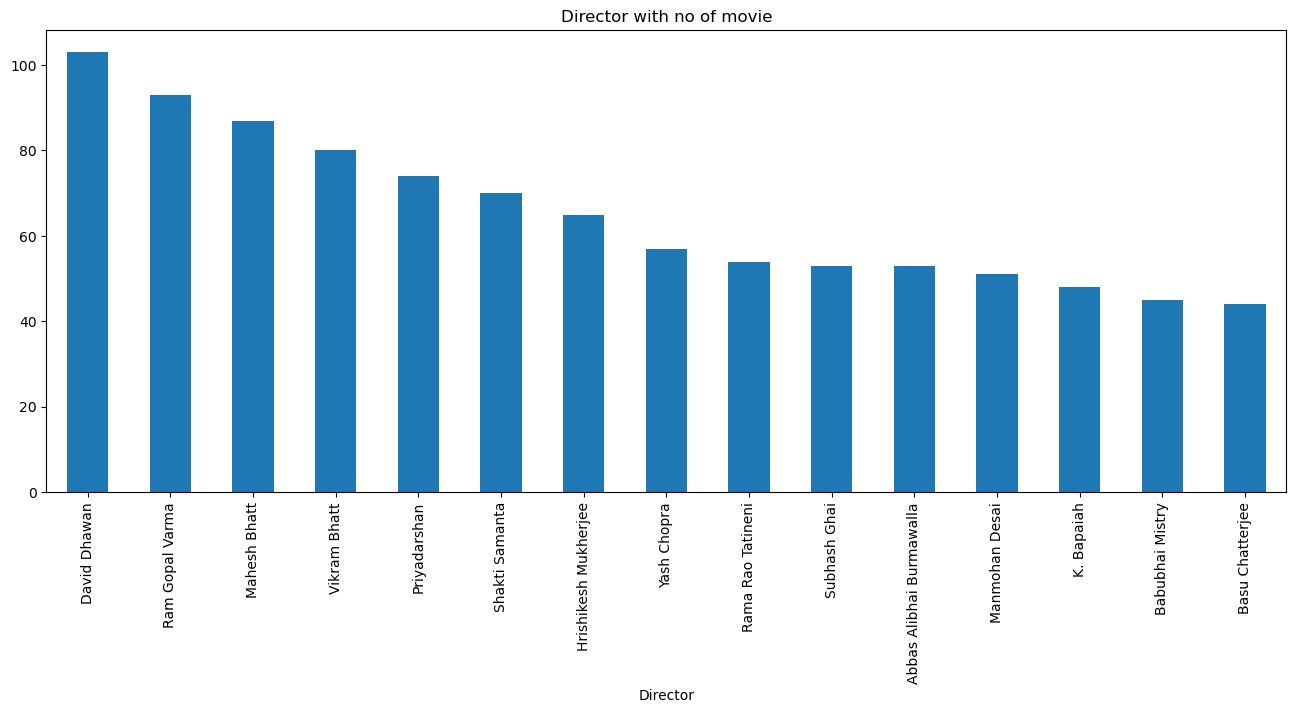

In [287]:
plt.figure(figsize=(16,6))
df["Director"].value_counts(ascending=False)[ :15].plot(kind="bar")
plt.xticks(rotation=90)
plt.title("Director with no of movie")

Text(0.5, 1.0, 'popular Actor')

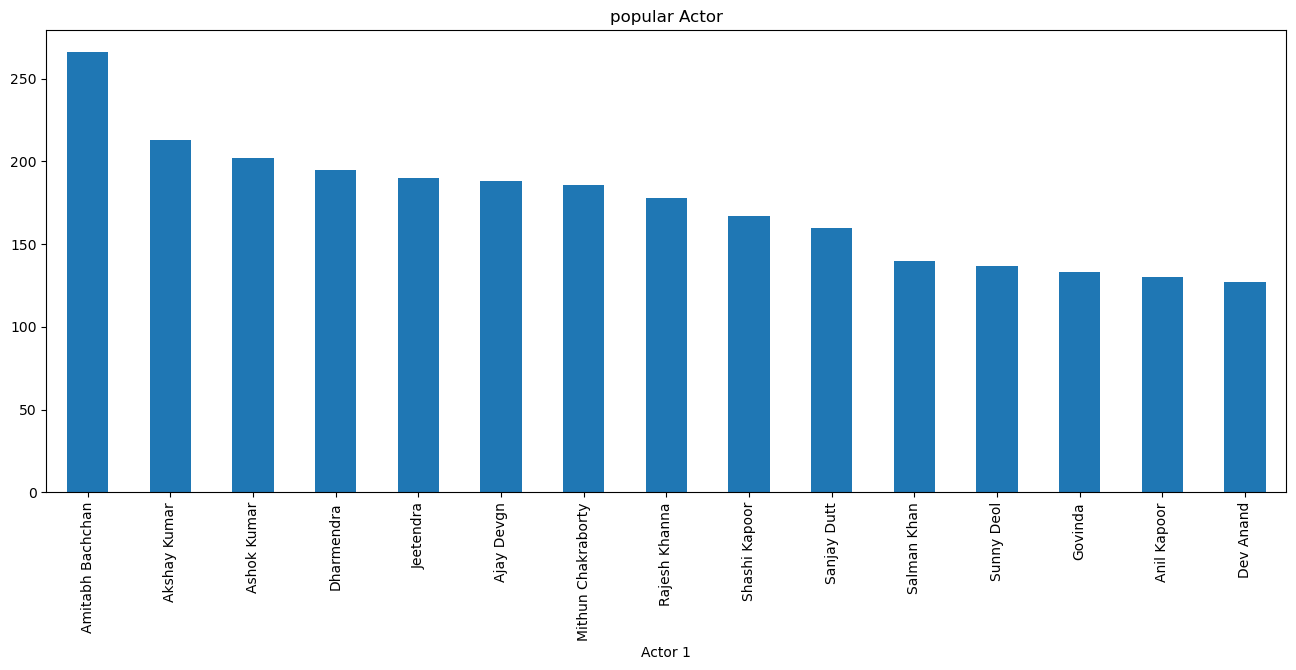

In [286]:
plt.figure(figsize=(16,6))
df['Actor 1'].value_counts(ascending=False)[:15].plot(kind='bar')
plt.xticks(rotation=90)
plt.title("popular Actor")

In [288]:
df.nunique()

Name        5385
Year          91
Duration     174
Genre         22
Rating        83
Votes       2027
Director    2431
Actor 1     1960
Actor 2     2321
Actor 3     2556
dtype: int64

In [291]:
df.drop("Name",axis=1)

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...
15503,1989,125,Drama,5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15505,1999,129,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15508,1998,130,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [301]:
import plotly.express as px
figg = px.histogram(data_frame=df, x='Genre', title='total no of Genre', color='Genre')

figg.show()

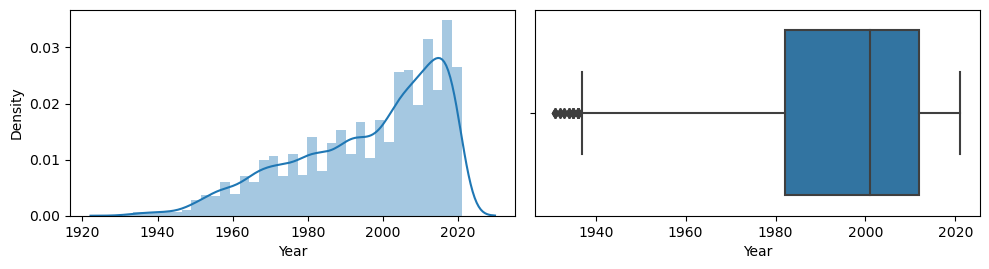

In [310]:

plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
sns.distplot(df['Year'])

plt.subplot(2,2,2)
sns.boxplot(x=df['Year'])

plt.tight_layout()
plt.show()


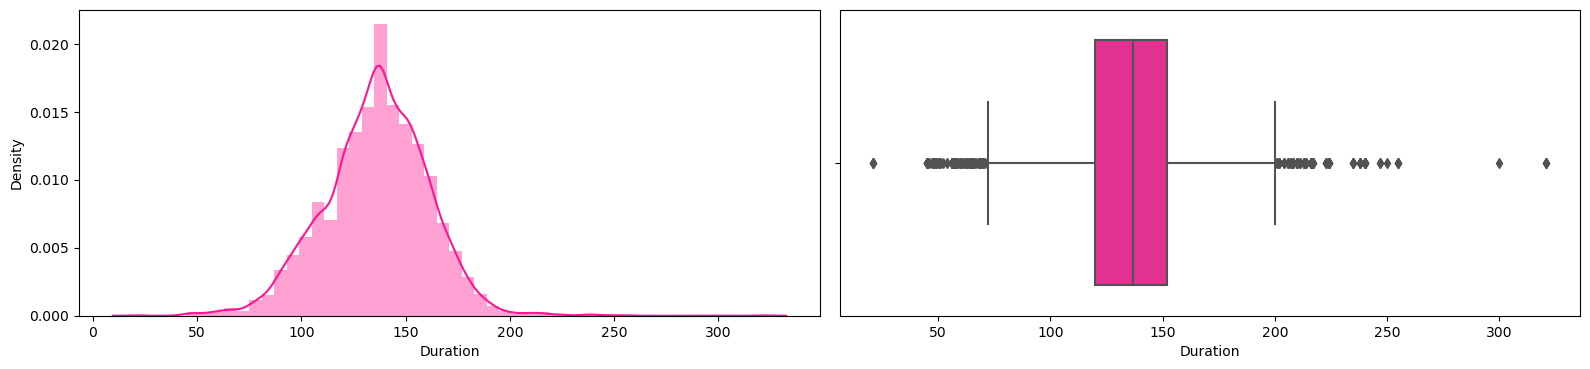

In [311]:
plt.figure(figsize=(16,7))

plt.subplot(2,2,1)
sns.distplot(df['Duration'],color='DeepPink')

plt.subplot(2,2,2)
sns.boxplot(x=df['Duration'],color='DeepPink')

plt.tight_layout()
plt.show()

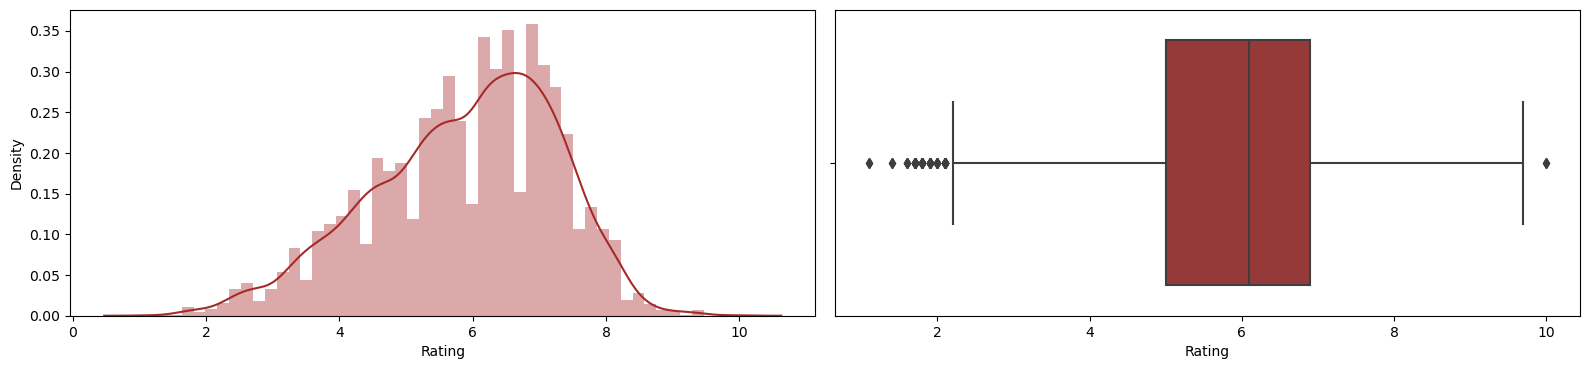

In [312]:
plt.figure(figsize=(16,7))

plt.subplot(2,2,1)
sns.distplot(df['Rating'],color='brown')

plt.subplot(2,2,2)
sns.boxplot(x=df['Rating'],color='brown')

plt.tight_layout()
plt.show()

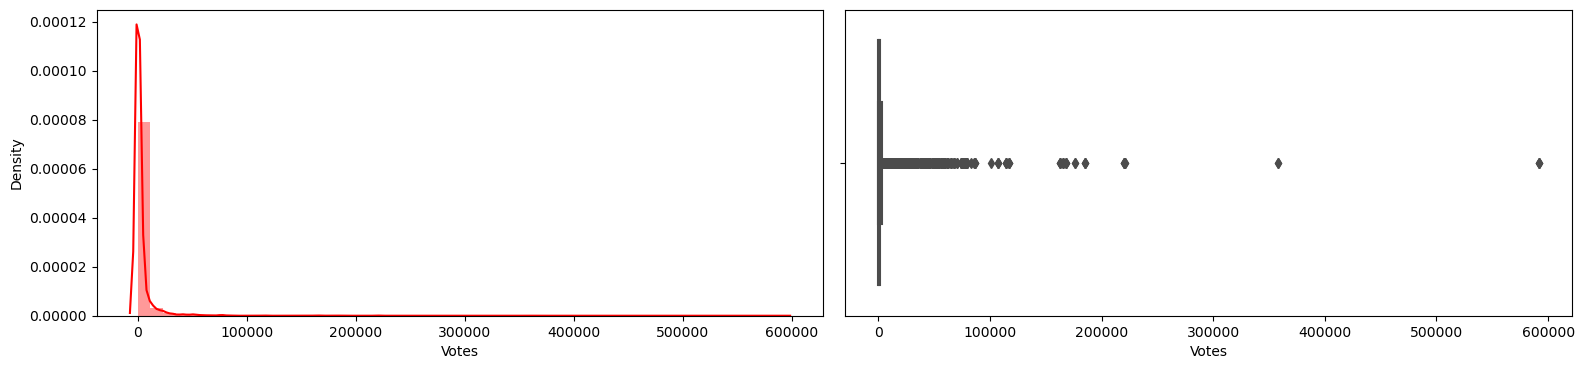

In [313]:
plt.figure(figsize=(16,7))

plt.subplot(2,2,1)
sns.distplot(df['Votes'],color='red')

plt.subplot(2,2,2)
sns.boxplot(x=df['Votes'],color='red')

plt.tight_layout()
plt.show()

In [58]:
gener_counts=df['Genre'].value_counts().reset_index()
gener_counts.columns=['Genre','Count']
top_n_genres=gener_counts.head()
top_n_genres

,Genre,Count
0,Drama,3796
1,Action,1686
2,Romance,1380
3,Comedy,1344
4,Crime,875


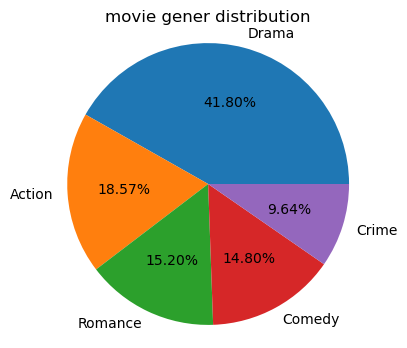

In [304]:
plt.figure(figsize=(4,4))
plt.pie(top_n_genres['Count'],labels=top_n_genres['Genre'],autopct="%.2f%%")
plt.title("movie gener distribution")
plt.axis('equal')
plt.show()

<Figure size 1600x700 with 0 Axes>

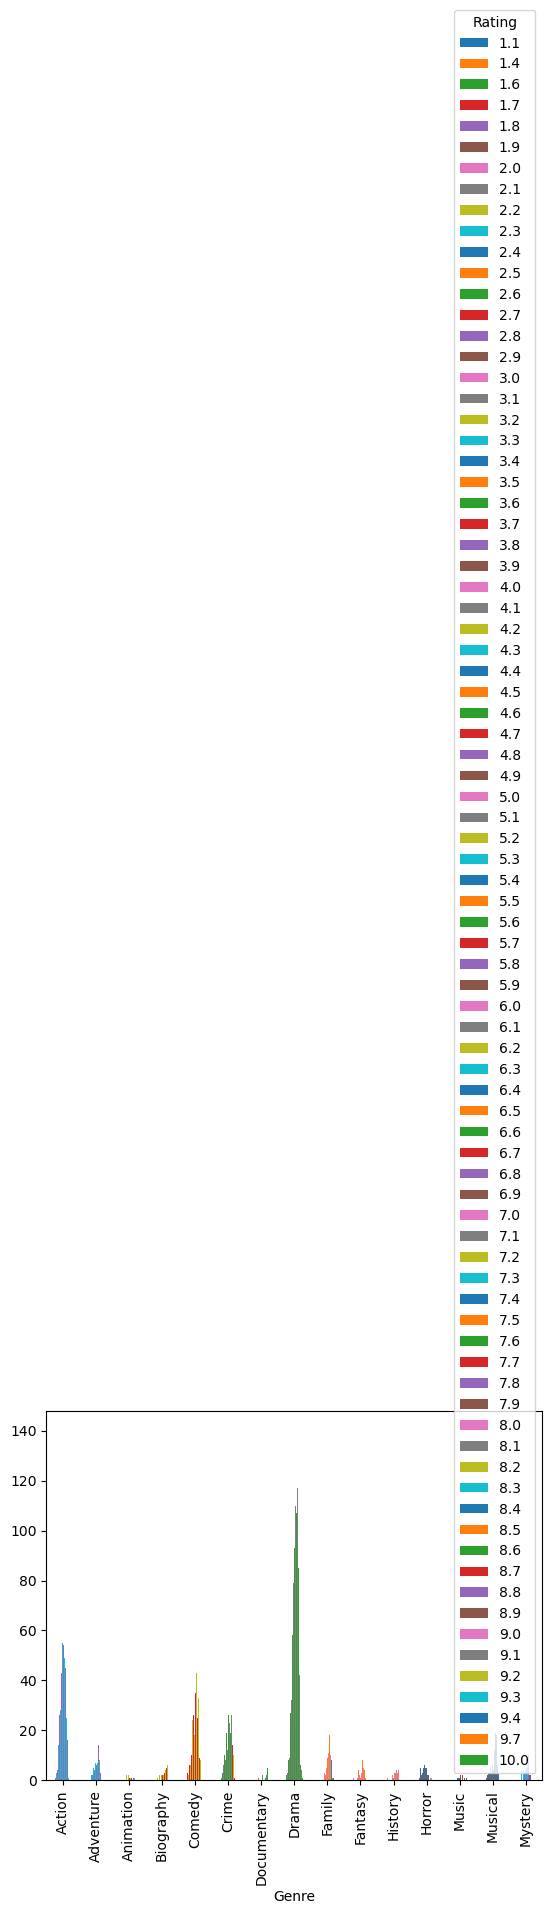

In [327]:
plt.figure(figsize=(16,7))
pd.crosstab(df['Genre'],df['Rating'])[:15].plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

# Modeling

In [193]:
x = df.drop(['Rating'],axis=1)
y = df['Rating']

# Encoding data using JamesSteinEncoder

In [268]:
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
encoder = ce.JamesSteinEncoder(return_df=True)
encoder.fit(x,y)
x = encoder.transform(x.loc[:,:])

In [263]:
x

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
1,0.588235,0.600000,-0.87500,0.783103,-0.143557,0.943456,0.986337,1.187186,1.147036
3,-0.941176,0.600000,-0.84375,-0.216897,-0.124650,-1.445572,-0.616591,-1.682140,-1.572456
3,-0.941176,0.600000,-0.84375,-0.029823,-0.124650,-1.445572,-0.616591,-1.682140,-1.572456
5,-0.764706,-0.133333,0.31250,-0.216897,0.429972,-0.376039,-0.820054,-0.131598,-0.023218
5,-0.764706,-0.133333,0.31250,0.783103,0.429972,-0.376039,-0.820054,-0.131598,-0.023218
...,...,...,...,...,...,...,...,...,...
15503,-0.117647,-0.400000,-0.37500,0.783103,-0.118347,0.232789,0.342708,-0.137118,0.065992
15505,-0.882353,-0.066667,-0.25000,-1.019408,0.309524,-0.604300,-0.362796,-1.158795,-0.128315
15505,-0.882353,-0.066667,-0.25000,0.783103,0.309524,-0.604300,-0.362796,-1.158795,-0.128315
15508,0.117647,-0.100000,-0.21875,-1.019408,-0.135154,-0.971516,0.011654,-0.237320,-0.152651


In [264]:
y

1        7.0
3        4.4
3        4.4
5        4.7
5        4.7
        ... 
15503    5.8
15505    4.5
15505    4.5
15508    6.2
15508    6.2
Name: Rating, Length: 11979, dtype: float64

# Normalizing data using Robust scaler

In [265]:
scaler = RobustScaler()
scaler.fit(x)
x.loc[:,:] = scaler.transform(x.loc[:,:])

In [266]:
x

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
1,0.588235,0.600000,-0.87500,0.783103,-0.143557,0.943456,0.986337,1.187186,1.147036
3,-0.941176,0.600000,-0.84375,-0.216897,-0.124650,-1.445572,-0.616591,-1.682140,-1.572456
3,-0.941176,0.600000,-0.84375,-0.029823,-0.124650,-1.445572,-0.616591,-1.682140,-1.572456
5,-0.764706,-0.133333,0.31250,-0.216897,0.429972,-0.376039,-0.820054,-0.131598,-0.023218
5,-0.764706,-0.133333,0.31250,0.783103,0.429972,-0.376039,-0.820054,-0.131598,-0.023218
...,...,...,...,...,...,...,...,...,...
15503,-0.117647,-0.400000,-0.37500,0.783103,-0.118347,0.232789,0.342708,-0.137118,0.065992
15505,-0.882353,-0.066667,-0.25000,-1.019408,0.309524,-0.604300,-0.362796,-1.158795,-0.128315
15505,-0.882353,-0.066667,-0.25000,0.783103,0.309524,-0.604300,-0.362796,-1.158795,-0.128315
15508,0.117647,-0.100000,-0.21875,-1.019408,-0.135154,-0.971516,0.011654,-0.237320,-0.152651


# Training model

In [267]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=7,shuffle=True,stratify=y)

# RandomForest

In [256]:
rfc=RandomForestRegressor(n_estimators=300)
model=rfc.fit(x_train,y_train)

In [257]:
model.score(x_train,y_train)

0.9987715878805846

In [258]:
model.score(x_test,y_test)

0.9909828181583116

In [295]:
pred_rf = model.predict(x_test)

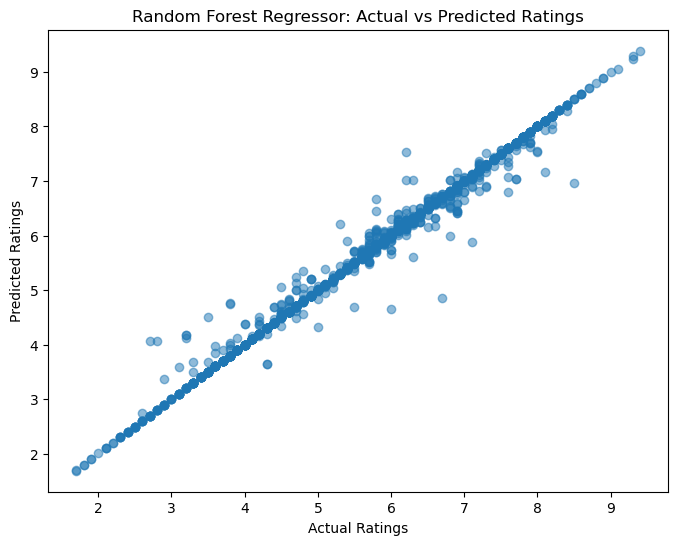

In [296]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_rf, alpha=0.5)
plt.title('Random Forest Regressor: Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

# XGBOOST

In [259]:
import xgboost as xgb
model_XG = xgb.XGBRegressor(n_estimators=300)
model_XG.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [260]:
model_XG.score(x_train,y_train)

0.9999563014297446

In [261]:
model_XG.score(x_test,y_test)

0.9954252946830205

In [297]:
pred_xg = model.predict(x_test)

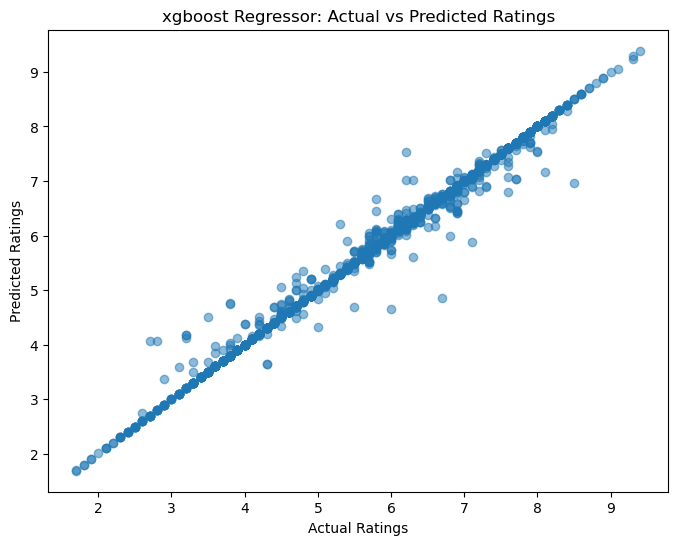

In [299]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_xg, alpha=0.5)
plt.title('xgboost Regressor: Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()